## Week 6: Dimensionality Reduction (PCA) and Model Validation

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%load_ext nb_black

<IPython.core.display.Javascript object>

**(1a) Load the data file 'data1.csv' and visualize the data using a scatter plot.**

In [2]:
data1 = pd.read_csv("data1.csv", header=None)

data1.head()

,0,1
0,-3.086760,0.012814
1,2.368870,-0.056970
2,-0.741769,0.089533
3,-1.221298,0.145294
4,-2.080397,0.118519


<IPython.core.display.Javascript object>

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [3]:
# Loss Due to removing x2

print("Loss due to removing x1 :", np.sum(data1[0].values ** 2))
print("Loss due to removing x2 :", np.sum(data1[1].values ** 2))

Loss due to removing x1 : 358.1035064241587
Loss due to removing x2 : 0.4191265524458239


<IPython.core.display.Javascript object>

Minimum loss is via removing x2, thus we only use x1

**(1c) Visualize the approximated data and compare it with the original data using scatter plot**

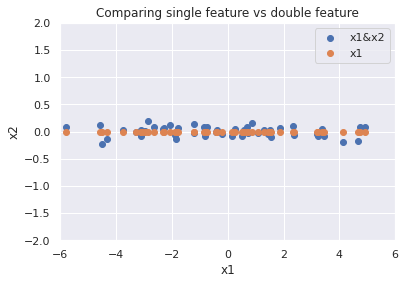

<IPython.core.display.Javascript object>

In [4]:
# Visualizing data using same scale along x and y

plt.title("Comparing single feature vs double feature")
plt.scatter(data1[0], data1[1], label="x1&x2")
plt.scatter(data1[0], np.zeros(len(data1[1])), label="x1")
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

**(2a) Load the data file 'data2.csv'.**

In [5]:
data2 = pd.read_csv("data2.csv", header=None)

data2.head()

,0,1,2,3
0,0.007589,-8.886696,-12.316361,-0.036092
1,-1.461927,3.977425,-17.784232,0.075197
2,-0.891625,-7.426320,25.122113,-0.150440
3,1.057471,4.184783,39.927021,0.068328
4,0.147645,-0.309380,33.502600,-0.125913


<IPython.core.display.Javascript object>

**(2c) Plot the minimum representation loss as a function of the number of features used for representation. Vary the number of features from 0 to 3**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

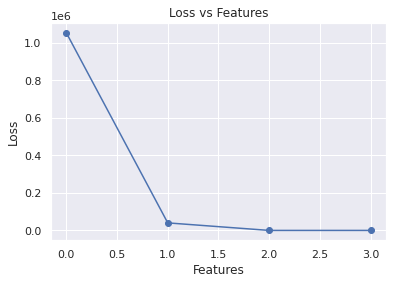

,Features,Losses
0,0,1.053533e+06
1,1,4.014408e+04
2,2,1.021137e+01
3,3,5.105685e+00


<IPython.core.display.Javascript object>

In [6]:
min_losses = []

# 0 Features

min_losses.append(np.sum(data2.values ** 2))

# 1 Feature

losses = []
for i in data2.columns:
    losses.append(np.sum(data2[set(data2.columns) - set([i])].values ** 2))

min_losses.append(min(losses))

# 2 Features

losses = []

for i in range(len(data2.columns)):
    for j in range(i, len(data2.columns)):
        losses.append(np.sum(data2[[data2.columns[i], data2.columns[j]]].values ** 2))

min_losses.append(min(losses))

# 3 Features

losses = []

for i in data2.columns:
    losses.append(np.sum(data2[i].values ** 2))

min_losses.append(min(losses))

# Plotting the loss

plt.title("Loss vs Features")
plt.plot(np.arange(len(min_losses)), min_losses)
plt.scatter(np.arange(len(min_losses)), min_losses)
plt.xlabel("Features")
plt.ylabel("Loss")
plt.show()

loss_dict = pd.DataFrame({"Features": np.arange(len(min_losses)), "Losses": min_losses})

display(loss_dict)

In [7]:
# Feature importance

losses_feat = []

for i, col in enumerate(data2.columns):
    losses_feat.append(("x" + str(i), np.sum(data2[col].values ** 2)))

print([i[0] for i in sorted(losses_feat, key=lambda x: -x[1])])

['x2', 'x1', 'x0', 'x3']


<IPython.core.display.Javascript object>

**(2d) Compute the covariance matrix of the data. Give your observations between the values in covariance matrix and feature importance obtained in (2c).**

In [8]:
print(np.cov(data2.values.T))

[[ 9.87196296e-01 -5.71788428e-02 -1.40990871e-01  3.05657061e-03]
 [-5.71788428e-02  3.91821903e+01  1.16676059e-01 -7.77027357e-03]
 [-1.40990871e-01  1.16676059e-01  1.00898980e+03  5.58349417e-02]
 [ 3.05657061e-03 -7.77027357e-03  5.58349417e-02  5.09299247e-03]]


<IPython.core.display.Javascript object>

The features with the higher value in diagonal have higher importance, since it is one of the factors used in calculation of the loss in information. This is because having a higher diagonal value indicates that their variance is high, indicating they can store more information. 

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of data**

In [9]:
data3 = pd.read_csv("data3.csv", header=None)

data3.head()

,0,1
0,-2.173608,-2.191730
1,1.634760,1.715328
2,-0.461201,-0.587819
3,-0.760849,-0.966327
4,-1.387257,-1.554868


<IPython.core.display.Javascript object>

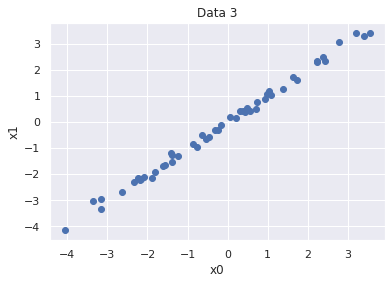

<IPython.core.display.Javascript object>

In [10]:
plt.title("Data 3")
plt.scatter(data3[0], data3[1])
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

**(3c) Apply PCA to transform data by retaining only 1 PC. Now, visualize the data points in transformed 1-dimensional space**

In [11]:
s_x = np.cov(data3.T)
v, w = np.linalg.eig(s_x)

print("Covariance Matrix :\n", s_x)

idx = v.argsort()[::-1]

v = v[idx]
w = w[:, idx]

print("Eigenvalue values: \n", v)
print("Eigen vectors: \n", w)

Covariance Matrix :
 [[3.59416569 3.61756379]
 [3.61756379 3.65805865]]
Eigenvalue values: 
 [7.24381702 0.00840733]
Eigen vectors: 
 [[-0.70397777 -0.710222  ]
 [-0.710222    0.70397777]]


<IPython.core.display.Javascript object>

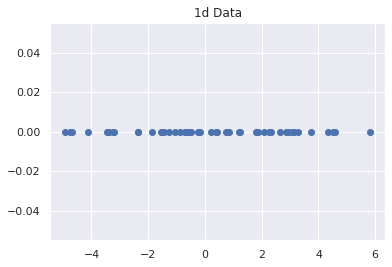

<IPython.core.display.Javascript object>

In [12]:
data3_new = data3.values.dot(w[:, 0])

plt.title("1d Data")
plt.scatter(data3_new, np.zeros(len(data3_new)))
plt.show()

**(3d) Compute the representational loss (with respect to the original data).**

**(3e) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [13]:
# Projecting the data to PCA space

data3_proj = data3.values.dot(w)

print(
    "Representational Loss with PCA transformation :",
    (np.sum(data3_proj[:, 0] ** 2 + data3_proj[:, 1] ** 2 - data3_new ** 2)),
)

Representational Loss with PCA transformation : 0.4120253056751544


<IPython.core.display.Javascript object>

In [14]:
print(
    "Minimum Representational Loss without PCA transformation :",
    min(s_x[0, 0], s_x[1, 1]) * (len(data3) - 1),
)

Minimum Representational Loss without PCA transformation : 176.11411905436043


<IPython.core.display.Javascript object>

### Application of PCA on real dataset

**(4a) Load the human face data set from sklearn (fetch_lfw_people).**

In [15]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

faces = fetch_lfw_people(min_faces_per_person=60)

X_face = np.array(faces["data"])

<IPython.core.display.Javascript object>

**(4b) Apply PCA on the faces data (sklearn can be used). Take the top 150 features from PCA. Reconstruct the images with the these 150 features and visualise them. Give your observations.**

In [16]:
n_samples, h, w = faces.images.shape

n_components = 150

<IPython.core.display.Javascript object>

In [17]:
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)

X_face_transformed = pca.fit_transform(X_face)

<IPython.core.display.Javascript object>

In [18]:
X_face_reconstruct = pca.inverse_transform(X_face_transformed).reshape(
    faces["images"].shape
)

<IPython.core.display.Javascript object>

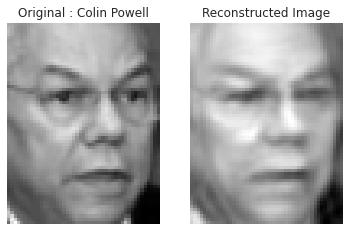

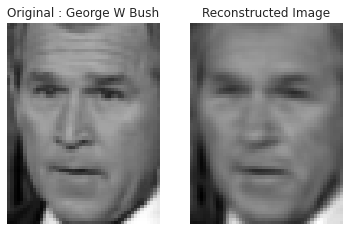

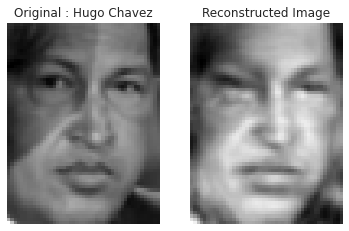

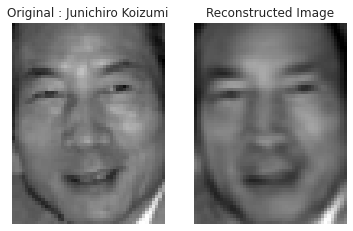

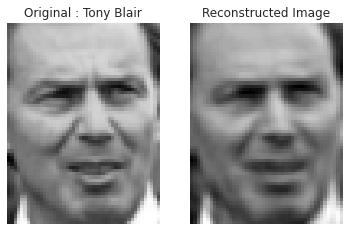

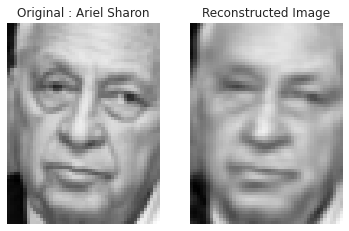

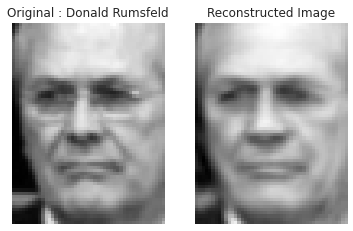

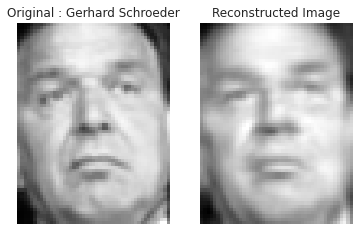

<IPython.core.display.Javascript object>

In [19]:
faces_seen = set()
i = 0
while len(faces_seen) < 8:
    if faces["target"][i] not in faces_seen:
        fig, axs = plt.subplots(1, 2)
        axs[1].imshow(X_face_reconstruct[i, :, :].reshape(h, w), cmap="gray")
        axs[1].title.set_text("Reconstructed Image")
        axs[1].axis("off")
        axs[0].imshow(faces["images"][i, :, :], cmap="gray")
        axs[0].title.set_text("Original : " + faces["target_names"][faces["target"][i]])
        axs[0].axis("off")
        plt.show()
        faces_seen.add(faces["target"][i])
    i += 1

We observe that the reconstructed images have lower quality than the original image due to the reduction in the number of features, but it is able to retain some features to resemble the original image.

### 5) Cross validation to select parameters for Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$


Perform ridge rigression using gradient descent on the data 4 provided. (You can use sklearn)

Try to fit the data with polynomial of degree 3 and 

- For $\lambda$ choose from = [10,100,1000]
- choose learning rate (here it is $\alpha$)= [ 0.01,0.001,0.0001,0.00001]
- max_iters = 1000

Choose the best combination of $\lambda$ and $\alpha$ using 5-fold cross validation on the dataset provided and report the same.


In [20]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [21]:
X_train = np.loadtxt("data_X.txt")[:, :-1]  # Removing the y_train from X_train
y_train = np.loadtxt("data_y.txt")
X_train_poly = PolynomialFeatures(degree=3).fit_transform(X_train)

print(X_train_poly.shape)

(506, 560)


<IPython.core.display.Javascript object>

In [22]:
lambd = [10, 100, 1000]
max_iters = 1000

<IPython.core.display.Javascript object>

In [23]:
model = Ridge(fit_intercept=False, max_iter=max_iters)
params_dict = {"alpha": lambd}

cv = GridSearchCV(model, params_dict, cv=5)

<IPython.core.display.Javascript object>

In [24]:
cv.fit(X_train_poly, y_train)

GridSearchCV(cv=5, estimator=Ridge(fit_intercept=False, max_iter=1000),
             param_grid={'alpha': [10, 100, 1000]})

<IPython.core.display.Javascript object>

In [25]:
params = cv.best_params_

print(params)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1
)

{'alpha': 100}


<IPython.core.display.Javascript object>

In [26]:
X_train_poly_n = PolynomialFeatures(degree=3).fit_transform(X_train_n)
X_val_poly_n = PolynomialFeatures(degree=3).fit_transform(X_val_n)

best_est = Ridge(alpha=params["alpha"], fit_intercept=False)

best_est.fit(X_train_poly_n, y_train_n)

Ridge(alpha=100, fit_intercept=False)

<IPython.core.display.Javascript object>

In [27]:
print(
    "Mean Square Error :", mean_squared_error(y_val_n, best_est.predict(X_val_poly_n))
)

Mean Square Error : 66.36752674239112


<IPython.core.display.Javascript object>